## Readme

This is a code created in the 2025 SABR Virtual online session by Nick Wan.

Here is how I followed along to the best of my ability.

In [3]:
import os
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns

# Most up to date that I can run
!pip install pybaseball==2.2.7

# getting baseball data
import pybaseball as bb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 43.3 MB/s eta 0:00:00


Function defining Cartesian

In [4]:
def polar_to_cartesian(radius, angle_degrees):
  """Converts polar coordinates (radius, angle) to Cartesian coordinates (x, y).

  Args:
    radius: The distance from the origin.
    angle_degrees: The angle in degrees measured counterclockwise from the positive x-axis.

  Returns:
    A tuple (x, y) representing the Cartesian coordinates.
  """
  angle_radians = np.radians(angle_degrees)
  x = radius * np.cos(angle_radians)
  y = radius * np.sin(angle_radians)
  return x, y

In [5]:
pid = 669923 # MLB Player Media ID which can be replaced with anyone desired
df = bb.statcast_pitcher(start_dt='2024-03-01',
                         end_dt='2024-11-01',
                         player_id=pid)
df.shape

Gathering Player Data


(3060, 113)

In [6]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
0,FF,2024-09-25,96.0,-1.56,5.96,"Kirby, George",518792,669923,field_out,hit_into_play,...,3,2,5.0,1.0,NaN,3.0,1.16,0.65,-0.65,35.3
1,SL,2024-09-25,85.4,-1.76,5.89,"Kirby, George",518792,669923,NaN,called_strike,...,3,2,5.0,1.0,NaN,3.0,3.24,-0.83,0.83,33.7
2,SL,2024-09-25,85.8,-1.74,5.94,"Kirby, George",518792,669923,NaN,ball,...,3,2,5.0,1.0,NaN,3.0,3.06,-0.99,0.99,38.3
3,SL,2024-09-25,87.6,-1.80,5.93,"Kirby, George",518792,669923,NaN,ball,...,3,2,5.0,1.0,NaN,3.0,3.15,-0.81,0.81,33.8
4,FF,2024-09-25,96.6,-1.49,6.03,"Kirby, George",605170,669923,field_out,hit_into_play,...,3,2,5.0,1.0,NaN,2.0,1.27,0.53,-0.53,35.0


In [7]:
df.columns.values

array(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year',
       'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire', 'sv_id', 'vx0',
       'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'game_pk', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9',
       'release_pos_y', 'estimated_ba_using_speedangle',
  

In [8]:
df['arm_angle'].describe()

,arm_angle
count,2967.000000
mean,36.633805
std,2.460919
min,28.700000
25%,35.100000
50%,36.500000
75%,38.000000
max,48.000000


In [9]:
df['pfx_z_adj'] = df['pfx_z'].mul(12)
df['pfx_x_adj'] = df['pfx_x'].mul(-12)
x,y = polar_to_cartesian(18,df['arm_angle'])
df['aa_x'] = x
df['aa_z'] = y
aa_x = df['aa_x'].mean()
aa_z = df['aa_z'].mean()

Plot trying to replicate Swing Take picture on Baseball Savant

https://baseballsavant.mlb.com/savant-player/george-kirby-669923?stats=statcast-r-pitching-mlb



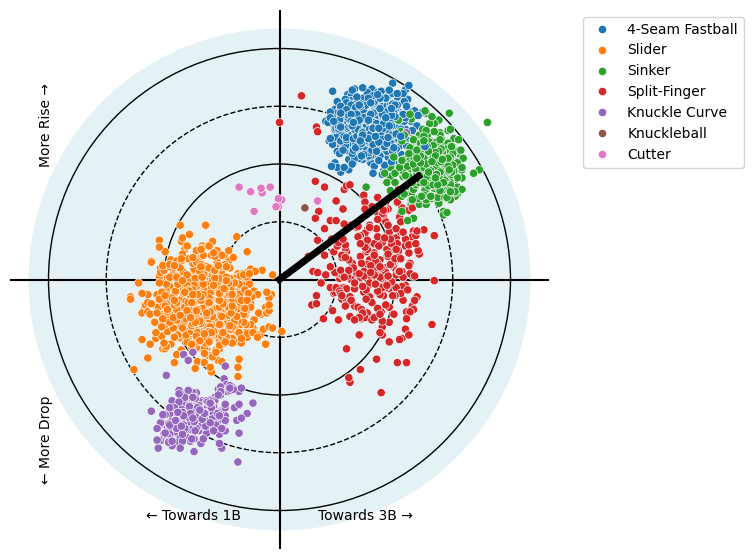

In [10]:
fig = plt.figure(figsize=(7,7))
fig = sns.scatterplot(data=df, x='pfx_x_adj',
                      y='pfx_z_adj', hue='pitch_name',
                      zorder=2)
plt.plot([0,aa_x], [0,aa_z], 'k-', lw=5)

p1 = Circle((0,0), 6, ls='--', zorder=0, fill=False)
p2 = Circle((0,0), 12, ls='-', zorder=0, fill=False)
p3 = Circle((0,0), 18, ls='--', zorder=0, fill=False)
p4 = Circle((0,0), 24, ls='-', zorder=0, fill=False)
p5 = Circle((0,0), 26, ls='-', zorder=-1,
            color=(228/255,242/255,245/255))

ps = [p1, p2, p3, p4, p5]

for p in ps:
  fig.add_artist(p)

plt.text(-25, 12, 'More Rise →', rotation=90)
plt.text(-25, -12, '← More Drop', rotation=90, va='top')
plt.text(4, -25, 'Towards 3B →')
plt.text(-4, -25, '← Towards 1B', ha='right')

plt.axhline(y=0, color='black', linestyle='-', zorder=1)
plt.axvline(x=0, color='black', linestyle='-', zorder=1)
plt.xlim(-28,28)
plt.ylim(-28,28)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
sns.despine(left=True, bottom=True)
fig.xaxis.set_visible(False)
fig.yaxis.set_visible(False)
fig.set_aspect('equal')
plt.show()